<a href="https://colab.research.google.com/github/AbigailBuchholz/test/blob/main/CrateProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
#Hello and welcome to my attempt at solving this project! 

# The first thing I do is import all the needed info
#I usually just import everything I think of so I don't have to add anything in later
import pandas as pd
from pandas import DataFrame, Series
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import ElasticNet

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [3]:
data_features=train.drop('target',axis=1)
data_labels=train['target']


In [4]:
from sklearn.model_selection import train_test_split
data_train_features, data_test_features, data_train_labels, data_test_labels=train_test_split(train, data_labels, test_size = 0.7)
data_train_features = data_train_features.drop(['target'], axis=1)


In [5]:

from xgboost import XGBClassifier
params = { "n_estimators": 400, 'tree_method':'gpu_hist', 'predictor':'gpu_predictor' }

model = XGBClassifier(**params)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method='gpu_hist', verbosity=1)

In [6]:
#now fit the data
model.fit(data_train_features, data_train_labels)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method='gpu_hist', verbosity=1)

In [7]:
#find best hyperparameter..........
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
import sys
import pandas as pd
seed=42
import numpy as np
n_estimators=[25,50,100,150]
max_depth=[1,2,3,4]

param_grid=dict(n_estimators=n_estimators, max_depth=max_depth)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(random_state=seed), verbose=10)
grid_results = grid.fit(data_train_features, data_train_labels)

print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))
print("it is done")
#parmgrid
 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ........ max_depth=1, n_estimators=25, score=0.982, total=   1.0s
[CV] max_depth=1, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=25, score=0.979, total=   1.0s
[CV] max_depth=1, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=25, score=0.986, total=   1.0s
[CV] max_depth=1, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=25, score=0.985, total=   1.0s
[CV] max_depth=1, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=25, score=0.986, total=   1.0s
[CV] max_depth=1, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=50, score=0.989, total=   1.9s
[CV] max_depth=1, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.8s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=50, score=0.989, total=   1.9s
[CV] max_depth=1, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.6s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=50, score=0.989, total=   1.9s
[CV] max_depth=1, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.5s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=50, score=0.989, total=   1.9s
[CV] max_depth=1, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.4s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=50, score=0.993, total=   1.9s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.992, total=   3.7s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.991, total=   3.7s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.995, total=   3.7s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.995, total=   3.7s
[CV] max_depth=1, n_estimators=100 ...................................
[CV] ....... max_depth=1, n_estimators=100, score=0.996, total=   3.7s
[CV] max_depth=1, n_estimators=150 ...................................
[CV] ....... max_depth=1, n_estimators=150, score=0.995, total=   5.5s
[CV] max_depth=1, n_estimators=150 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.3min finished


Best: 0.9965523481105529, using {'max_depth': 3, 'n_estimators': 100}
0.9836235628314312 (0.0028204687251522226) with: {'max_depth': 1, 'n_estimators': 25}
0.9900340689051517 (0.001642227743870912) with: {'max_depth': 1, 'n_estimators': 50}
0.9938050692116237 (0.0019039691212203622) with: {'max_depth': 1, 'n_estimators': 100}
0.9952594913491275 (0.0011992977116678258) with: {'max_depth': 1, 'n_estimators': 150}
0.9939128278323132 (0.0015661680282013431) with: {'max_depth': 2, 'n_estimators': 25}
0.9950440031297306 (0.0010982678769401331) with: {'max_depth': 2, 'n_estimators': 50}
0.996390753712492 (0.0008782574348628812) with: {'max_depth': 2, 'n_estimators': 100}
0.9963907682234833 (0.0007913119514229909) with: {'max_depth': 2, 'n_estimators': 150}
0.995367177414861 (0.0005218481135683887) with: {'max_depth': 3, 'n_estimators': 25}
0.9955826221012843 (0.000650774230865426) with: {'max_depth': 3, 'n_estimators': 50}
0.9965523481105529 (0.000668165157537608) with: {'max_depth': 3, 'n_es

In [8]:
grid_results.best_params_
#max depth 3, n estimator 150

{'max_depth': 3, 'n_estimators': 100}

In [9]:
from xgboost import XGBClassifier
params= {"max_depth":3, "n_estimators":150}
model=XGBClassifier(**params)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [10]:
%time model.fit(data_train_features,data_train_labels)

CPU times: user 34.5 s, sys: 61.1 ms, total: 34.5 s
Wall time: 34.4 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [12]:
data_test_features=data_test_features.drop('target',axis=1)
result=model.predict_proba(test)
from sklearn.metrics import accuracy_score
#accuracy_score(data_test_labels, predictions)

KeyError: ignored

In [13]:
result

array([[9.9908602e-01, 5.7620497e-04, 1.0499648e-04, ..., 3.2653636e-05,
        2.8471828e-05, 4.1988638e-05],
       [9.9925524e-01, 3.8221432e-04, 9.5669660e-05, ..., 3.2659165e-05,
        3.0880823e-05, 4.1995754e-05],
       [9.9923790e-01, 3.8220768e-04, 9.5668001e-05, ..., 3.2658598e-05,
        3.0426678e-05, 4.1995023e-05],
       ...,
       [2.0539117e-05, 2.1461146e-05, 1.9220666e-05, ..., 4.5214572e-05,
        1.4177167e-04, 9.9967313e-01],
       [2.0538639e-05, 2.1460648e-05, 1.7509927e-05, ..., 4.5213521e-05,
        1.4176838e-04, 9.9964988e-01],
       [2.0539421e-05, 1.5232104e-05, 1.9220950e-05, ..., 4.5215242e-05,
        1.4388737e-04, 9.9968791e-01]], dtype=float32)

In [15]:
df = pd.DataFrame(result)
df.index += 1 
df.index.name = 'id'
df.columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']
df
df.to_csv('results.csv')

In [16]:
df

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.999086,0.000576,0.000105,0.000056,0.000034,0.000040,0.000033,0.000028,0.000042
2,0.999255,0.000382,0.000096,0.000055,0.000042,0.000065,0.000033,0.000031,0.000042
3,0.999238,0.000382,0.000096,0.000050,0.000042,0.000087,0.000033,0.000030,0.000042
4,0.999267,0.000382,0.000105,0.000056,0.000034,0.000053,0.000033,0.000028,0.000042
5,0.999136,0.000382,0.000096,0.000050,0.000192,0.000039,0.000033,0.000031,0.000042
...,...,...,...,...,...,...,...,...,...
144364,0.000021,0.000014,0.000019,0.000019,0.000019,0.000029,0.000045,0.000142,0.999693
144365,0.000021,0.000015,0.000019,0.000021,0.000023,0.000032,0.000045,0.000154,0.999671
144366,0.000021,0.000021,0.000019,0.000019,0.000019,0.000041,0.000045,0.000142,0.999673


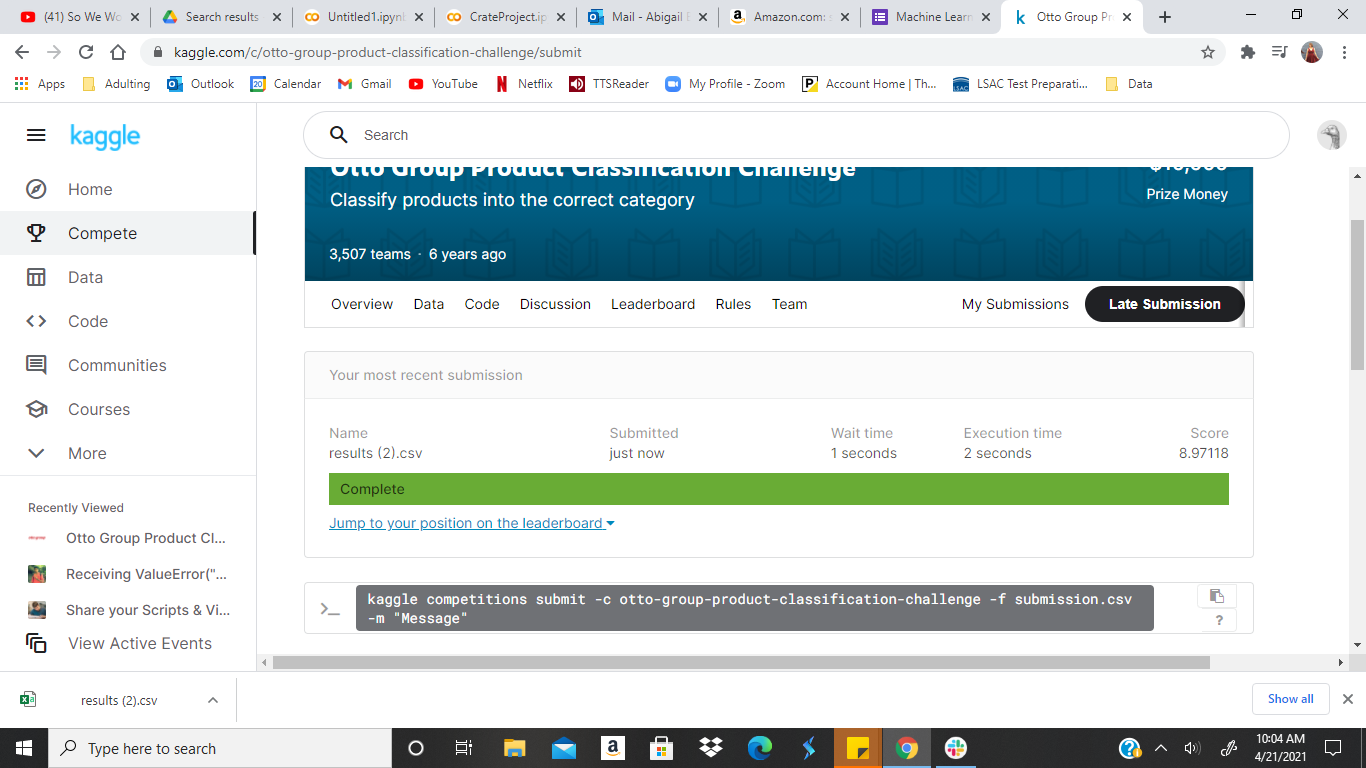